In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import os

In [2]:
os.getcwd()
os.chdir('./images')
os.getcwd()
os.chdir('..')
os.getcwd()

'/Users/hanmingyin/MyDoc/COMP9321/Ass3/8.Demo'

'/Users/hanmingyin/MyDoc/COMP9321/Ass3/8.Demo/images'

'/Users/hanmingyin/MyDoc/COMP9321/Ass3/8.Demo'

In [28]:
CSV = pd.read_csv('train.csv', index_col= 0)
CSV.head()

,Rooms,Type,Price,Method,SellerG,Sold_Year,Distance,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount
1,2,h,1480000.0,S,Biggin,2016,2.5,1.0,1.0,202.0,Yarra City Council,Northern Metropolitan,4019.0
2,2,h,1035000.0,S,Biggin,2016,2.5,1.0,0.0,156.0,Yarra City Council,Northern Metropolitan,4019.0
4,3,h,1465000.0,SP,Biggin,2017,2.5,2.0,0.0,134.0,Yarra City Council,Northern Metropolitan,4019.0
5,3,h,850000.0,PI,Biggin,2017,2.5,2.0,1.0,94.0,Yarra City Council,Northern Metropolitan,4019.0
6,4,h,1600000.0,VB,Nelson,2016,2.5,1.0,2.0,120.0,Yarra City Council,Northern Metropolitan,4019.0


In [43]:
CSV1 = CSV[CSV['SellerG'] == 'Nelson']
CSV1 = CSV1.groupby(by = ['SellerG', "Sold_Year"]).size()
CSV1.reset_index(name = 'times')


,SellerG,Sold_Year,times
0,Nelson,2016,1051
1,Nelson,2017,1380
2,Nelson,2018,304


,Landsize,Price,Avg
Regionname,,,
Eastern Metropolitan,1.779752e+06,3.055663e+09,1716.903430
Eastern Victoria,2.915994e+05,1.148625e+08,393.905096
Northern Metropolitan,3.141801e+06,5.181309e+09,1649.152541
Northern Victoria,5.113924e+05,1.004555e+08,196.435278
South-Eastern Metropolitan,6.718785e+05,9.691877e+08,1442.504393


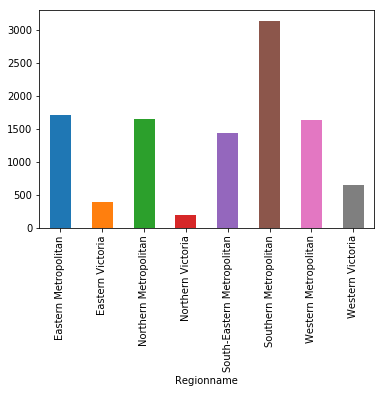

In [34]:
CSV2 = CSV[['Regionname', 'Landsize', 'Price', 'Type']]
CSV2 = CSV2[CSV2['Type'] == 'h']
CSV2 = CSV2.groupby('Regionname').sum()
CSV2['Avg'] = CSV2.apply(lambda x: x.Price / x.Landsize, axis = 1)
CSV2.head()
CSV2 = CSV2['Avg']
CSV2.plot.bar()
plt.show()